### 통계1일차 실습문제 

### [실습] 기술통계 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats


In [2]:
ds_mycars = pd.read_csv('/home/piai/test/Daily/mycars.csv', engine = 'python')
ds_mycars.head()

manufacturer model  displacement  year  cylinder automatic driving  mpg  \
0         audi    a4           1.8  1999         4      auto       f   18   
1         audi    a4           1.8  1999         4    manual       f   21   
2         audi    a4           2.0  2008         4    manual       f   20   
3         audi    a4           2.0  2008         4      auto       f   21   
4         audi    a4           2.8  1999         6      auto       f   16   

   highway_mileage fuel    class  
0               29    p  compact  
1               29    p  compact  
2               31    p  compact  
3               30    p  compact  
4               26    p  compact

In [12]:
# 구동 방식별 시내에서 연비

df = ds_mycars[['driving','mpg']]
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [13]:
# 구동 방식별 고속도로에서 연비

df = ds_mycars[['driving','highway_mileage']]
df.groupby('driving').describe()

highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

### [실습] 기술통계

In [39]:
#driving 변수에 대해 counts, percents, cumulative counts, cumulatice percents 계산
count = ds_mycars['driving'].value_counts().sort_index()
count

4    103
f    106
r     25
Name: driving, dtype: int64

In [4]:
percent = count/ sum(count) * 100
percent

4    44.017094
f    45.299145
r    10.683761
Name: driving, dtype: float64

In [7]:
cumcnt = np.cumsum(count)
cumcnt

4    103
f    209
r    234
Name: driving, dtype: int64

In [8]:
cumpct = np.cumsum(percent)
cumpct

4     44.017094
f     89.316239
r    100.000000
Name: driving, dtype: float64

In [10]:
count_data = pd.DataFrame({'Count' : count, 'Percent': percent, 'Cumcnt' : cumcnt, 'Cumpct': cumpct})
count_data.columns.name = 'Flaws'
count_data

Flaws  Count    Percent  Cumcnt      Cumpct
4        103  44.017094     103   44.017094
f        106  45.299145     209   89.316239
r         25  10.683761     234  100.000000

### [실습] 정규분포의 확률계산

In [22]:
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x,mu,sigma)
print("나의 키가 {0}cm일 경우에 나는 {1:.1f}%에 위치함".format(x,(1-prob)*100))

나의 키가 180cm일 경우에 나는 15.9%에 위치함


### [실습] 정규분포의 확률계산

In [27]:
mu = 12
sigma = 3
x1 = 9
x2 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)
prob2 = stats.norm.cdf(x2, mu, sigma)
print("1) {0}km 이상 {1}km이하를 달릴 확률은 {2:.1f}%에 해당함".format(x1,x2,(prob2-prob1)*100))

1) 9km 이상 15km이하를 달릴 확률은 68.3%에 해당함


In [32]:
mu = 12
sigma = 3
x2 = 15
prob2 = stats.norm.cdf(x2, mu, sigma)
print("2) {0}km 이상 달릴 확률은 {1:.1f}%에 해당함".format(x2,(1-prob2)*100))

2) 15km 이상 달릴 확률은 15.9%에 해당함


### [실습] t분포

In [33]:
t = 2.0 # t값
df = 100 #자유도
prob = stats.t.cdf(t,df)
print("P(T<=t):{:.3f}%".format(prob*100))

P(T<=t):97.589%


### [실습] 카이제곱 분포 그리기

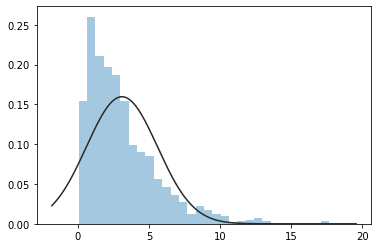

In [45]:
np.random.seed(seed =1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
sns.distplot(chisq_df3, fit = stats.norm, kde = False)

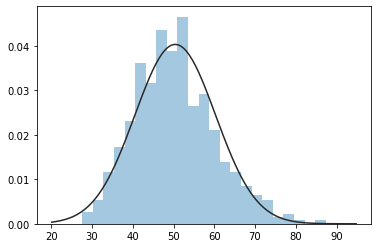

In [43]:
np.random.seed(seed =1234)
chisq_df50 = np.random.chisquare(df = 50, size = 1000)
sns.distplot(chisq_df50, fit = stats.norm, kde = False)

### [실습]카이제곱 분포

In [34]:

chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq, df)
print('P(X<={0}): {1:.4f}'.format(chisq, prob))

P(X<=3.0): 0.0656


### [실습] F-분포

In [3]:
f = 1.5
dfnum = 10
dfden = 100

prob =stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.999
